In [1]:
# импортировать библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# показывать больше строк и столбцов
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50)

# загрузить файл
stud = pd.read_csv('stud_math.csv') 
display(stud.head(10))
display(stud.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [2]:
# определить размер датасета
stud.shape

(395, 30)

In [3]:
# преобразовать все столбы с типом float в целочисленные, данные позволяют это сделать:
# часть числовых столбцов - это перечисление из нескольких вариантов, absences - заполнено только целыми
# (для большого размера датасета это будет иметь значение - для сокращения занимаемой памяти)
 
# что-то тут у меня с функцией не получилось, и имеет ли смысл, если изменение типа и так одна строка?    
#def integer (value):   
#    value1 = value.astype('Int64')
#    return value1

stud.Medu = stud.Medu.astype('Int64')
stud.Fedu = stud.Fedu.astype('Int64')
stud.traveltime = stud.traveltime.astype('Int64')
stud.studytime = stud.studytime.astype('Int64')
stud.failures = stud.failures.astype('Int64')
stud['studytime, granular'] = stud['studytime, granular'].astype('Int64')
stud.famrel = stud.famrel.astype('Int64')
stud.freetime = stud.freetime.astype('Int64')
stud.goout = stud.goout.astype('Int64')
stud.health = stud.health.astype('Int64')
stud.absences = stud.absences.astype('Int64')
# stud.score = stud.score.astype('Int64')

In [4]:
# просмотреть типы всех данных
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    Int64  
 7   Fedu                 371 non-null    Int64  
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    Int64  
 13  studytime            388 non-null    Int64  
 14  failures             373 non-null    Int64  
 15  schoolsup            386 non-null    obj

None

In [5]:
# вывести пропуски
null_data = stud.isnull().sum()
null_data[null_data>0]

address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [6]:
stud.score 
# баллы за госэкзамен также являются целочисленными значениями, перевести их в int64

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 395, dtype: float64

In [7]:
# нулевых значений везде меньше 40%, столбцы не удалять
col_for_drop = [col for col in stud.columns if stud[col].isnull().sum()>stud[col].shape[0]*0.4]
print(col_for_drop)

# удалить строки, где не заполнен параметр score - т.к. он является целевым

stud = stud.drop(stud[stud.score.isnull() == True].index)
stud.shape

[]


(389, 30)

In [8]:
stud.age.agg([np.mean, np.max, np.min, np.std])
# с возрастом все в порядке, выбросов нет

mean    16.673522
amax    22.000000
amin    15.000000
std      1.265662
Name: age, dtype: float64

In [9]:
# поскольку ряд числовых переменных должны содержать фиксированное количество значений
# проверить их на наличие выбросов, пропусков и заменить пустые на наиболее часто встречающиеся значения
# для таких переменных напишем функцию change_nan

#def change_nan (col):   Не получилось с функцией заполняет значения, но в дальнейшем опять возврщаются пустые
#    display(col.value_counts())
#    col = col.fillna(col.value_counts().index[0])
#    display(col.value_counts())
#    return col
# change_nan(stud.Medu)


stud.Medu = stud.Medu.fillna(stud.Medu.value_counts().index[0])
stud.Fedu = stud.Fedu.fillna(stud.Fedu.value_counts().index[0])
stud.traveltime = stud.traveltime.fillna(stud.traveltime.value_counts().index[0])
stud.studytime = stud.studytime.fillna(stud.studytime.value_counts().index[0])
stud.failures = stud.failures.fillna(stud.failures.value_counts().index[0])
stud.famrel = stud.famrel.fillna(stud.famrel.value_counts().index[0])
stud.freetime = stud.freetime.fillna(stud.freetime.value_counts().index[0])
stud.goout = stud.goout.fillna(stud.goout.value_counts().index[0])
stud.health = stud.health.fillna(stud.health.value_counts().index[0])

# пустые значения absences заменить на медианное
stud.absences = stud.absences.fillna(stud.absences.median())

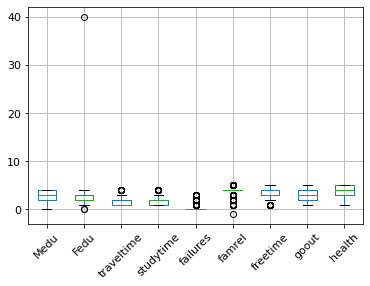

In [10]:
boxplot = stud.boxplot(column=['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',\
                              'health'], rot=45, fontsize=11)

In [11]:
display(stud.Fedu.value_counts())

2     129
3      94
4      88
1      75
0       2
40      1
Name: Fedu, dtype: Int64

In [12]:
# есть выброс, скорее всего ошибка (4 или 0), заменим его на наиболее часто встречающееся из них - 4
stud[stud.Fedu == 40]
stud.loc[stud.Fedu == 40, 'Fedu'] = 4
display(stud.Fedu.value_counts())

2    129
3     94
4     89
1     75
0      2
Name: Fedu, dtype: Int64

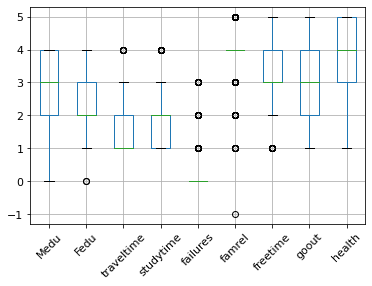

In [13]:
# повторить визуализацию распределения
boxplot = stud.boxplot(column=['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',\
                              'health'], rot=45, fontsize=11)

In [14]:
display(stud.famrel.value_counts())

 4    205
 5     97
 3     62
 2     17
 1      7
-1      1
Name: famrel, dtype: Int64

In [15]:
# есть выброс -1, заменить на наиболее частое
stud.loc[stud.famrel == -1, 'famrel'] = 4
display(stud.famrel.value_counts())

4    206
5     97
3     62
2     17
1      7
Name: famrel, dtype: Int64

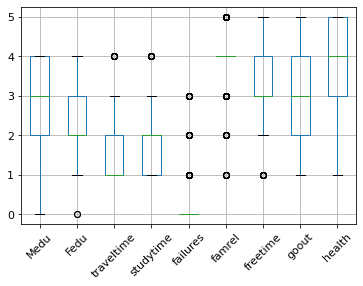

In [16]:
# повторить визуализацию распределения
boxplot = stud.boxplot(column=['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout',\
                              'health'], rot=45, fontsize=11)

In [17]:
# вывести пропуски
stud.isnull().sum()

school                  0
sex                     0
age                     0
address                15
famsize                27
Pstatus                45
Medu                    0
Fedu                    0
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime              0
studytime               0
failures                0
schoolsup               9
famsup                 38
paid                   39
activities             14
nursery                15
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                  0
freetime                0
goout                   0
health                  0
absences                0
score                   0
dtype: int64

In [18]:
# проверить количество уникальных значений для номинативных переменных
# выбросов нет
stud.select_dtypes(include=object).nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [19]:
# построить матрицу корреляций числовых переменных - очень небольшие показатели
# возможно, номинативные переменные в большей степени скоррелированы с чем-либо, поэтому для номинативных
# выполним замену значений и преобразуем тип
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.145755,-0.143849,0.076013,-0.018019,0.206279,0.018227,0.053021,0.013994,0.121057,-0.061752,0.095475,-0.155726
Medu,-0.145755,1.000000,0.583292,-0.156090,0.076035,-0.238295,-0.076607,-0.009469,0.040743,0.070310,-0.070420,-0.013775,0.200890
Fedu,-0.143849,0.583292,1.000000,-0.107267,0.011723,-0.260794,-0.011778,-0.019910,-0.022669,0.046401,-0.015777,0.020055,0.124829
traveltime,0.076013,-0.156090,-0.107267,1.000000,-0.098226,0.035113,0.099356,-0.034992,-0.016696,0.046390,-0.035336,-0.038691,-0.056535
studytime,-0.018019,0.076035,0.011723,-0.098226,1.000000,-0.169399,-1.000000,0.027460,-0.122057,-0.053554,-0.063876,-0.024807,0.114295
failures,0.206279,-0.238295,-0.260794,0.035113,-0.169399,1.000000,0.170933,-0.007672,0.087558,0.101036,0.079030,0.057144,-0.337187
"studytime, granular",0.018227,-0.076607,-0.011778,0.099356,-1.000000,0.170933,1.000000,-0.027886,0.123897,0.054087,0.064381,0.024875,-0.115741
famrel,0.053021,-0.009469,-0.019910,-0.034992,0.027460,-0.007672,-0.027886,1.000000,0.156171,0.061699,0.103669,-0.078426,0.048896
freetime,0.013994,0.040743,-0.022669,-0.016696,-0.122057,0.087558,0.123897,0.156171,1.000000,0.294450,0.067629,0.008199,0.017481
goout,0.121057,0.070310,0.046401,0.046390,-0.053554,0.101036,0.054087,0.061699,0.294450,1.000000,-0.015108,-0.048650,-0.127742


In [20]:
print(stud.school.unique())
stud.loc[stud.school == 'GP', 'school'] = 1
stud.loc[stud.school == 'MS', 'school'] = 2
stud.school = stud.school.astype('Int64')
print(stud.school.unique())

['GP' 'MS']
<IntegerArray>
[1, 2]
Length: 2, dtype: Int64


In [21]:
print(stud.sex.unique())
stud.loc[stud.sex == 'F', 'sex'] = 1
stud.loc[stud.sex == 'M', 'sex'] = 2
stud.sex = stud.sex.astype('Int64')
print(stud.sex.unique())

['F' 'M']
<IntegerArray>
[1, 2]
Length: 2, dtype: Int64


In [22]:
print(stud.address.unique())
stud.loc[stud.address == 'U', 'address'] = 1
stud.loc[stud.address == 'R', 'address'] = 2
stud.address = stud.address.astype('Int64')
print(stud.address.unique())

['U' nan 'R']
<IntegerArray>
[1, <NA>, 2]
Length: 3, dtype: Int64


In [23]:
print(stud.famsize.unique())
stud.loc[stud.famsize == 'GT3', 'famsize'] = 1
stud.loc[stud.famsize == 'LE3', 'famsize'] = 2
stud.famsize = stud.famsize.astype('Int64')
print(stud.famsize.unique())

[nan 'GT3' 'LE3']
<IntegerArray>
[<NA>, 1, 2]
Length: 3, dtype: Int64


In [24]:
print(stud.Pstatus.unique())
stud.loc[stud.Pstatus == 'A', 'Pstatus'] = 1
stud.loc[stud.Pstatus == 'T', 'Pstatus'] = 2
stud.Pstatus = stud.Pstatus.astype('Int64')
print(stud.Pstatus.unique())

['A' nan 'T']
<IntegerArray>
[1, <NA>, 2]
Length: 3, dtype: Int64


In [25]:
print(stud.Mjob.unique())
stud.loc[stud.Mjob == 'at_home', 'Mjob'] = 1
stud.loc[stud.Mjob == 'health', 'Mjob'] = 2
stud.loc[stud.Mjob == 'other', 'Mjob'] = 3
stud.loc[stud.Mjob == 'services', 'Mjob'] = 4
stud.loc[stud.Mjob == 'teacher', 'Mjob'] = 5
stud.Mjob = stud.Mjob.astype('Int64')
print(stud.Mjob.unique())

['at_home' 'health' 'other' 'services' 'teacher' nan]
<IntegerArray>
[1, 2, 3, 4, 5, <NA>]
Length: 6, dtype: Int64


In [26]:
print(stud.Fjob.unique())
stud.loc[stud.Fjob == 'at_home', 'Fjob'] = 1
stud.loc[stud.Fjob == 'health', 'Fjob'] = 2
stud.loc[stud.Fjob == 'other', 'Fjob'] = 3
stud.loc[stud.Fjob == 'services', 'Fjob'] = 4
stud.loc[stud.Fjob == 'teacher', 'Fjob'] = 5
stud.Fjob = stud.Fjob.astype('Int64')
print(stud.Fjob.unique())

['teacher' 'other' nan 'health' 'services' 'at_home']
<IntegerArray>
[5, 3, <NA>, 2, 4, 1]
Length: 6, dtype: Int64


In [27]:
print(stud.reason.unique())
stud.loc[stud.reason == 'course', 'reason'] = 1
stud.loc[stud.reason == 'other', 'reason'] = 2
stud.loc[stud.reason == 'home', 'reason'] = 3
stud.loc[stud.reason == 'reputation', 'reason'] = 4
stud.reason = stud.reason.astype('Int64')
print(stud.reason.unique())

['course' 'other' 'home' 'reputation' nan]
<IntegerArray>
[1, 2, 3, 4, <NA>]
Length: 5, dtype: Int64


In [28]:
print(stud.guardian.unique())
stud.loc[stud.guardian == 'mother', 'guardian'] = 1
stud.loc[stud.guardian == 'father', 'guardian'] = 2
stud.loc[stud.guardian == 'other', 'guardian'] = 3
stud.guardian = stud.guardian.astype('Int64')
print(stud.guardian.unique())


['mother' 'father' 'other' nan]
<IntegerArray>
[1, 2, 3, <NA>]
Length: 4, dtype: Int64


In [29]:
print(stud.schoolsup.unique())
stud.loc[stud.schoolsup == 'yes', 'schoolsup'] = 1
stud.loc[stud.schoolsup == 'no', 'schoolsup'] = 2
stud.schoolsup = stud.schoolsup.astype('Int64')
print(stud.schoolsup.unique())

['yes' 'no' nan]
<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64


In [30]:
print(stud.famsup.unique())
stud.loc[stud.famsup == 'yes', 'famsup'] = 1
stud.loc[stud.famsup == 'no', 'famsup'] = 2
stud.famsup = stud.famsup.astype('Int64')
print(stud.famsup.unique())

['no' 'yes' nan]
<IntegerArray>
[2, 1, <NA>]
Length: 3, dtype: Int64


In [31]:
print(stud.paid.unique())
stud.loc[stud.paid == 'yes', 'paid'] = 1
stud.loc[stud.paid == 'no', 'paid'] = 2
stud.paid = stud.paid.astype('Int64')
print(stud.paid.unique())

['no' nan 'yes']
<IntegerArray>
[2, <NA>, 1]
Length: 3, dtype: Int64


In [32]:
print(stud.activities.unique())
stud.loc[stud.activities == 'yes', 'activities'] = 1
stud.loc[stud.activities == 'no', 'activities'] = 2
stud.activities = stud.activities.astype('Int64')
print(stud.activities.unique())

['no' 'yes' nan]
<IntegerArray>
[2, 1, <NA>]
Length: 3, dtype: Int64


In [33]:
print(stud.nursery.unique())
stud.loc[stud.nursery == 'yes', 'nursery'] = 1
stud.loc[stud.nursery == 'no', 'nursery'] = 2
stud.nursery = stud.nursery.astype('Int64')
print(stud.nursery.unique())

['yes' 'no' nan]
<IntegerArray>
[1, 2, <NA>]
Length: 3, dtype: Int64


In [34]:
print(stud.higher.unique())
stud.loc[stud.higher == 'yes', 'higher'] = 1
stud.loc[stud.higher == 'no', 'higher'] = 2
stud.higher = stud.higher.astype('Int64')
print(stud.higher.unique())


['yes' nan 'no']
<IntegerArray>
[1, <NA>, 2]
Length: 3, dtype: Int64


In [35]:
print(stud.internet.unique())
stud.loc[stud.internet == 'yes', 'internet'] = 1
stud.loc[stud.internet == 'no', 'internet'] = 2
stud.internet = stud.internet.astype('Int64')
print(stud.internet.unique())

[nan 'yes' 'no']
<IntegerArray>
[<NA>, 1, 2]
Length: 3, dtype: Int64


In [36]:
print(stud.romantic.unique())
stud.loc[stud.romantic == 'yes', 'romantic'] = 1
stud.loc[stud.romantic == 'no', 'romantic'] = 2
stud.romantic = stud.romantic.astype('Int64')
print(stud.romantic.unique())

['no' nan 'yes']
<IntegerArray>
[2, <NA>, 1]
Length: 3, dtype: Int64


In [37]:
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    Int64  
 1   sex                  389 non-null    Int64  
 2   age                  389 non-null    int64  
 3   address              374 non-null    Int64  
 4   famsize              362 non-null    Int64  
 5   Pstatus              344 non-null    Int64  
 6   Medu                 389 non-null    Int64  
 7   Fedu                 389 non-null    Int64  
 8   Mjob                 370 non-null    Int64  
 9   Fjob                 353 non-null    Int64  
 10  reason               372 non-null    Int64  
 11  guardian             358 non-null    Int64  
 12  traveltime           389 non-null    Int64  
 13  studytime            389 non-null    Int64  
 14  failures             389 non-null    Int64  
 15  schoolsup            380 non-null    Int

None

In [38]:
stud.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.022548,0.379549,0.286299,0.061563,0.071788,-0.131774,-0.078285,-0.055168,0.036836,-0.123398,0.017401,0.224058,-0.092208,0.046515,0.137437,0.178216,0.024106,0.108217,0.112111,0.092605,0.032333,0.108298,-0.065249,-0.043702,0.034138,-0.008473,-0.042288,0.013071,-0.044524
sex,-0.022548,1.000000,-0.030956,-0.003618,0.097646,0.041123,0.086463,0.025312,0.189874,0.068341,-0.076061,-0.020810,0.048250,-0.304851,0.021199,0.129119,0.150486,0.100323,-0.121570,-0.008567,0.307686,0.153677,-0.055620,0.134138,0.038889,0.228632,0.092635,0.148973,-0.040474,0.099285
age,0.379549,-0.030956,1.000000,0.154098,0.035535,0.008821,-0.145755,-0.143849,-0.065713,-0.041147,-0.010366,0.220858,0.076013,-0.018019,0.206279,0.262174,0.155132,0.028742,0.106135,0.096939,0.018227,0.215877,0.124521,-0.155696,0.053021,0.013994,0.121057,-0.061752,0.095475,-0.155726
address,0.286299,-0.003618,0.154098,1.000000,-0.062178,0.067010,-0.155746,-0.080956,-0.135240,0.001795,-0.018513,-0.088132,0.266490,0.046608,0.094192,0.030553,0.025500,0.054165,-0.052258,0.057312,-0.046787,0.051472,0.213569,-0.009740,0.012352,-0.050419,-0.060763,0.046819,-0.026991,-0.120067
famsize,0.061563,0.097646,0.035535,-0.062178,1.000000,-0.075207,-0.066104,-0.093982,0.069808,-0.072499,0.001197,-0.054652,0.052113,-0.084227,0.016120,0.027927,0.124383,0.085055,0.026346,-0.100998,0.085007,0.024709,0.005070,-0.012570,-0.023547,0.033373,0.034012,-0.034938,0.012549,0.063324
Pstatus,0.071788,0.041123,0.008821,0.067010,-0.075207,1.000000,-0.126196,-0.095048,-0.046460,-0.004220,-0.031942,0.013117,0.084061,0.006612,0.006702,0.039740,0.027294,-0.041345,-0.105468,0.064031,-0.006832,0.030578,-0.059785,0.047740,0.012459,0.054245,0.034655,0.007013,-0.108706,-0.045985
Medu,-0.131774,0.086463,-0.145755,-0.155746,-0.066104,-0.126196,1.000000,0.583292,0.461086,0.203337,0.118670,-0.123058,-0.156090,0.076035,-0.238295,0.025548,-0.200826,-0.161086,-0.099526,-0.186361,-0.076607,-0.165245,-0.206522,-0.011647,-0.009469,0.040743,0.070310,-0.070420,-0.013775,0.200890
Fedu,-0.078285,0.025312,-0.143849,-0.080956,-0.093982,-0.095048,0.583292,1.000000,0.216054,0.202963,0.065361,0.012985,-0.107267,0.011723,-0.260794,-0.049335,-0.204088,-0.091889,-0.098867,-0.146728,-0.011778,-0.182971,-0.134849,-0.008190,-0.019910,-0.022669,0.046401,-0.015777,0.020055,0.124829
Mjob,-0.055168,0.189874,-0.065713,-0.135240,0.069808,-0.046460,0.461086,0.216054,1.000000,0.185386,0.046004,-0.089585,-0.069172,-0.001108,-0.090422,0.045350,-0.078972,-0.139751,-0.099410,-0.107597,0.001137,-0.108419,-0.175550,0.093630,0.045330,0.110716,0.014465,0.068076,0.058560,0.101975
Fjob,0.036836,0.068341,-0.041147,0.001795,-0.072499,-0.004220,0.203337,0.202963,0.185386,1.000000,-0.108504,0.009358,0.042287,-0.068674,0.022746,0.002890,0.043961,0.027786,-0.037979,0.024126,0.069338,0.051459,-0.004473,-0.036235,0.023125,-0.020225,0.038233,-0.001204,0.110219,0.036349


In [39]:
# Рассматривать корреляцию переменной score.
# Наибольший коэффициент у переменных age, address, Medu, Fedu, Mjob, studytime, failures (наибольший), higher, goout.
# Их и предлагается использовать для дальнейшего построения модели
# Поскольку все параметры имеют всего по несколько значений, для определения уровня связи можно руководствоваться 
# только коэффициентами корреляции.
# В данных переменных присутстуют пропуски, их следует заполнить. Можно заполнить значениями пропорционально тех,
# что заполнены